In [49]:
import pandas_datareader.data as web
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

In [360]:
start = datetime(2000,1,1)
end = datetime(2021,2,1)

In [361]:
end

datetime.datetime(2021, 2, 1, 0, 0)

# SPDR S&P 500 ETF Trust

In [362]:
Stock= web.DataReader('SPY','yahoo',start=start,end=end)

In [363]:
Stock.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,148.25000,143.875000,148.25000,145.4375,8164300.0,98.146072
2000-01-04,144.06250,139.640625,143.53125,139.7500,8089800.0,94.307983
2000-01-05,141.53125,137.250000,139.93750,140.0000,12177900.0,94.476685
2000-01-06,141.50000,137.750000,139.62500,137.7500,6227200.0,92.958336
2000-01-07,145.75000,140.062500,140.31250,145.7500,8066500.0,98.356987


In [364]:
returns =100* Stock.Close.pct_change().dropna()

Text(0.5, 1.0, 'Stock Returns')

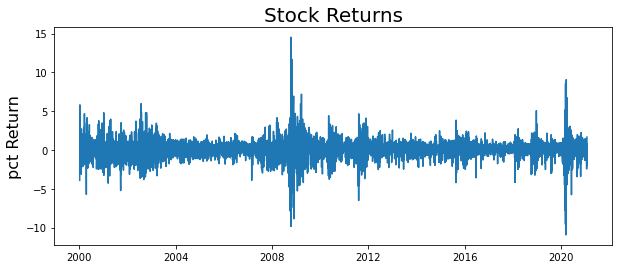

In [366]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('pct Return', fontsize=16)
plt.title('Stock Returns', fontsize=20)

# PACF

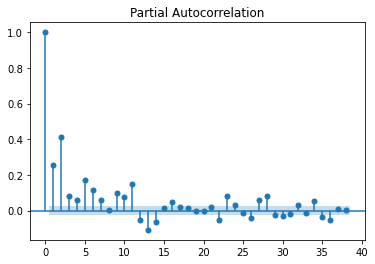

In [340]:

plot_pacf(returns**2)
plt.show()

# GARCH (2,2) vs GARCH (3,3)

In [379]:
model= arch_model(returns,p=2,q=2)

In [380]:
model_fit= model.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 90196.73229625403
Iteration:      2,   Func. Count:     20,   Neg. LLF: 22797.256785249454
Iteration:      3,   Func. Count:     31,   Neg. LLF: 11467.408024200147
Iteration:      4,   Func. Count:     40,   Neg. LLF: 10091.766500521586
Iteration:      5,   Func. Count:     49,   Neg. LLF: 8371.318162934094
Iteration:      6,   Func. Count:     58,   Neg. LLF: 7479.125115910733
Iteration:      7,   Func. Count:     66,   Neg. LLF: 7311.004112712316
Iteration:      8,   Func. Count:     74,   Neg. LLF: 7312.431341883416
Iteration:      9,   Func. Count:     82,   Neg. LLF: 7312.409191715502
Iteration:     10,   Func. Count:     90,   Neg. LLF: 7304.036518358589
Iteration:     11,   Func. Count:     97,   Neg. LLF: 7304.036484375869
Iteration:     12,   Func. Count:    104,   Neg. LLF: 7304.036483526748
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7304.036483526748
            Iterations: 1

In [381]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7304.04
Distribution:                  Normal   AIC:                           14620.1
Method:            Maximum Likelihood   BIC:                           14659.5
                                        No. Observations:                 5303
Date:                Sat, Feb 20 2021   Df Residuals:                     5302
Time:                        15:22:34   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0660  1.097e-02      6.018  1.769e-09 [4.451e-02,8.751e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0428  9.624e-03      4.451  8.536e-06 [2.398e-02,6.170e-02]
alpha[1]       0.0813  2.140e-02      3.798  1.457e-04   [3.934e-02,  0.123]
alpha[2]       0.1413  2.552e-02      5.535  3.113e-08   [9.123e-02,  0.191]
beta[1]        0.2521      0.222      1.135      0.256     [ -0.183,  0.687]
beta[2]        0.4957      0.197      2.518  1.181e-02     [  0.110,  0.882]
============================================================================

Covariance estimator: robust
"""

garch(3,0)

In [385]:
model=arch_model(returns,p=3,q=3)

In [386]:
model_fit=model.fit()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 41309.45559142355
Iteration:      2,   Func. Count:     24,   Neg. LLF: 4824313513.5285015
Iteration:      3,   Func. Count:     35,   Neg. LLF: 10560.607313142405
Iteration:      4,   Func. Count:     45,   Neg. LLF: 8684.652382431785
Iteration:      5,   Func. Count:     56,   Neg. LLF: 11716.839873651285
Iteration:      6,   Func. Count:     67,   Neg. LLF: 7539.91514469147
Iteration:      7,   Func. Count:     77,   Neg. LLF: 7336.230980428961
Iteration:      8,   Func. Count:     87,   Neg. LLF: 7318.395137128793
Iteration:      9,   Func. Count:     97,   Neg. LLF: 7329.551882065847
Iteration:     10,   Func. Count:    107,   Neg. LLF: 7315.05116374098
Iteration:     11,   Func. Count:    117,   Neg. LLF: 7307.238871661351
Iteration:     12,   Func. Count:    127,   Neg. LLF: 7310.271544212598
Iteration:     13,   Func. Count:    137,   Neg. LLF: 7306.467576897428
Iteration:     14,   Func. Count:    147,   Neg. LLF: 7304.6982

In [387]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7303.96
Distribution:                  Normal   AIC:                           14623.9
Method:            Maximum Likelihood   BIC:                           14676.5
                                        No. Observations:                 5303
Date:                Sat, Feb 20 2021   Df Residuals:                     5302
Time:                        15:23:24   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0659  1.097e-02      6.008  1.873e-09 [4.441e-02,8.740e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0534  5.303e-02      1.006      0.314 [-5.057e-02,  0.157]
alpha[1]       0.0800  2.100e-02      3.810  1.392e-04  [3.885e-02,  0.121]
alpha[2]       0.1591      0.103      1.544      0.123 [-4.293e-02,  0.361]
alpha[3]       0.0369      0.173      0.214      0.831    [ -0.301,  0.375]
beta[1]        0.0000      1.195      0.000      1.000    [ -2.342,  2.342]
beta[2]        0.5990      0.257      2.331  1.975e-02  [9.534e-02,  1.103]
beta[3]        0.0881      0.656      0.134      0.893    [ -1.197,  1.373]
===========================================================================

Covariance estimator: robust
"""

# Rolling Forecast

In [388]:
rolling_prediction=[]
test_size= 365*5
for i in range (test_size):
    train=returns[:-(test_size - i)]
    model=arch_model(train,p=2,q=2)
    model_fit=model.fit(disp='off')
    pred= model_fit.forecast(horizon=1)
    rolling_prediction.append(np.sqrt(pred.variance.values[-1,:][0]))

In [389]:
returns

Date
2000-01-04   -3.910615
2000-01-05    0.178891
2000-01-06   -1.607143
2000-01-07    5.807623
2000-01-10    0.343053
                ...   
2021-01-26   -0.156093
2021-01-27   -2.444046
2021-01-28    0.860020
2021-01-29   -2.001959
2021-02-01    1.664551
Name: Close, Length: 5303, dtype: float64

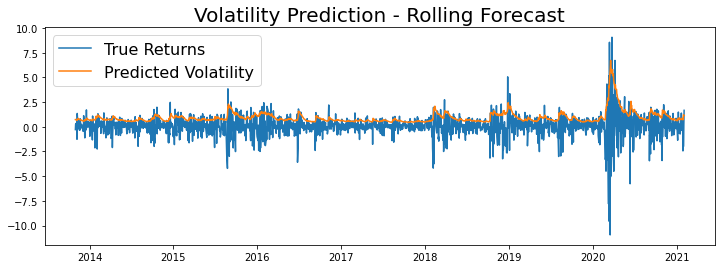

In [390]:
plt.figure(figsize=(12,4))
true, = plt.plot(returns[-365*5:])
preds, = plt.plot(returns.index[-365*5:], rolling_prediction)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

# Forcasting

In [391]:
train = returns
model = arch_model(train, p=2, q=2)
model_fit = model.fit(disp='off')

In [392]:
pred = model_fit.forecast(horizon=7)
future_dates = [returns.index[-1] + timedelta(days=i) for i in range(1,8)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)


Text(0.5, 1.0, 'volatility prediction in the next 7 days')

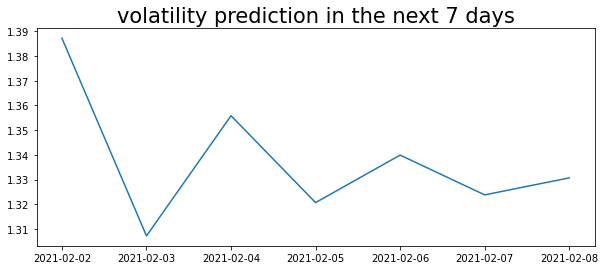

In [393]:
plt.figure(figsize=(10,4))
plt.plot(pred)
plt.title('volatility prediction in the next 7 days', fontsize=21)

## Stock Volatility

In [394]:
Ticker= web.DataReader('SPY','yahoo', start=datetime(2021,2,1),end=datetime(2021,2,8))


In [395]:
Ticker = 100* Ticker.Close.pct_change().dropna()


<AxesSubplot:xlabel='Date'>

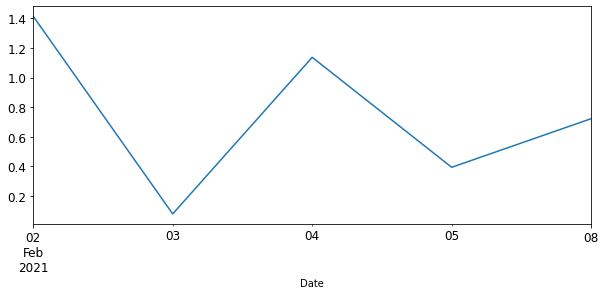

In [396]:
Ticker.plot(figsize=(10,4),fontsize=12)

# Normalization and comparison 

In [397]:
nor_ticker = (Ticker-min(Ticker))/(max(Ticker)-min(Ticker))

In [398]:
nor_pred = (pred-min(pred))/(max(pred)-min(pred))

<AxesSubplot:xlabel='Date'>

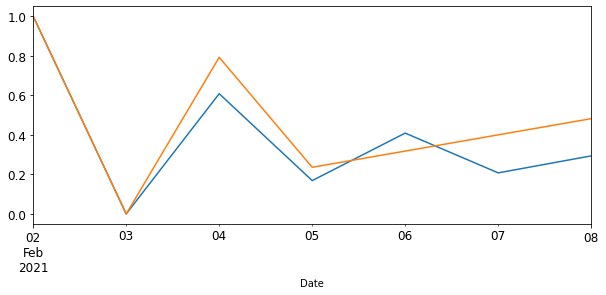

In [399]:
nor_pred.plot(figsize=(10,4),fontsize=12)
nor_ticker.plot(figsize=(10,4),fontsize=12)
